### Problem Statement
#### Build a predictive model to determine the likelihood of survival for passengers on the Titanic.

### Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Reading Dataset

In [30]:
titanic_data = pd.read_csv("train.csv")

### Sanity Check

In [31]:
#Shape
print('There are {} rows and {} columns'.format(titanic_data.shape[0],titanic_data.shape[1]))

There are 891 rows and 12 columns


In [32]:
titanic_data.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
740,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S


In [33]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic_data['Sex'].nunique()

2

In [36]:
Types = titanic_data.dtypes
Types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [37]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
#finding null values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
missing_percentages = (titanic_data.isnull().sum()/titanic_data.shape[0])*100
missing_percentages

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

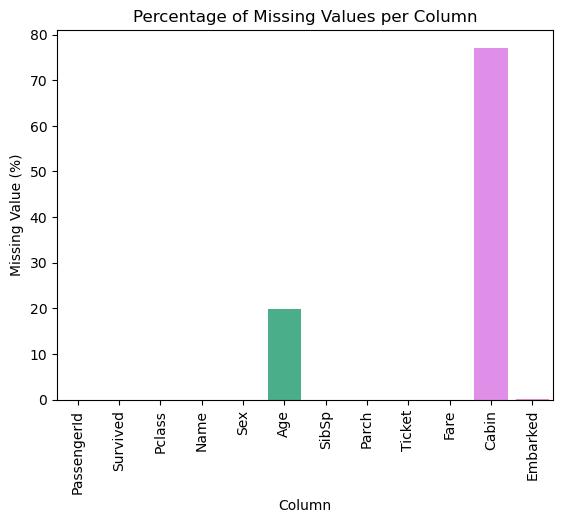

In [40]:
missing_percentages = (titanic_data.isnull().sum()/titanic_data.shape[0])*100
missing_percentages

sns.barplot(x=missing_percentages.index, y=missing_percentages.values)
plt.xlabel("Column")
plt.ylabel("Missing Value (%)")
plt.title("Percentage of Missing Values per Column")
plt.xticks(rotation=90)
plt.show()

In [41]:
titanic_data.duplicated().sum()

0

### Null/Missing value treatment
- We have missing values in three columns 
- Age
- Cabin 
- Embarked

In [42]:
#Cabin
#Since Cabin having a large proportion of null values we are dropping the column
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [43]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [44]:
#Embarked
titanic_data['Embarked'].nunique()

3

In [49]:
titanic_data["Embarked"].isnull().sum()

2

In [50]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [51]:
#replace the mode value with the missing value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [52]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
#Age
#replacing missing values with mean number
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [54]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Exploratory Data Analysis (EDA)

In [56]:
#descriptive statistics
summary = titanic_data.describe(percentiles=[0.25,0.5, 0.95, 0.75, 0.05]) #we can transpose using .T
summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
5%,45.500000,0.000000,1.000000,6.000000,0.000000,0.000000,7.225000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
95%,846.500000,1.000000,3.000000,54.000000,3.000000,2.000000,112.079150
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
#how many survived?
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

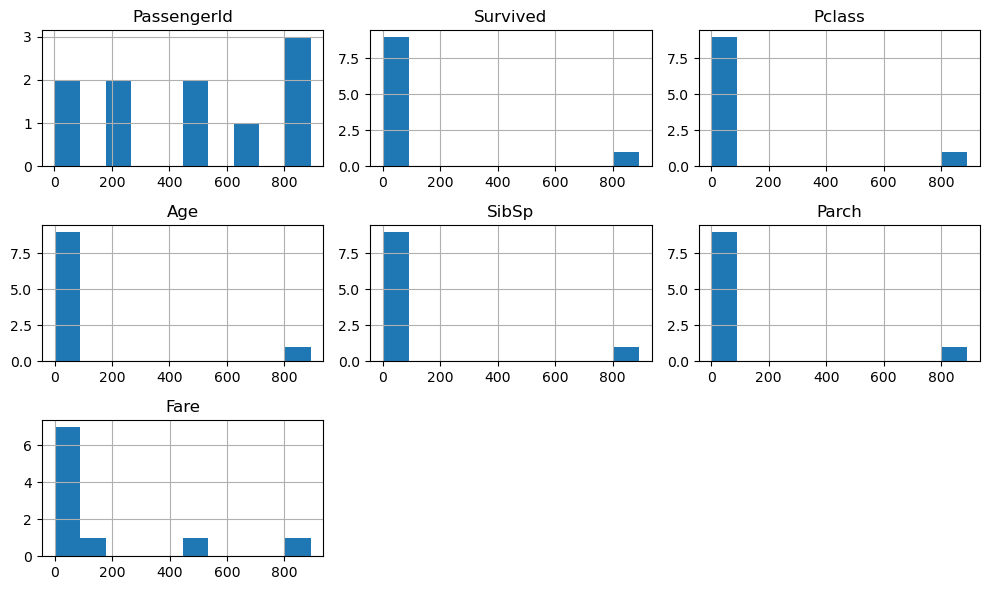

In [64]:
# Create histograms for each variable
summary.hist(figsize=(10, 6))  

plt.xlabel("Variable")
plt.ylabel("Frequency")
plt.title("Distribution of Features with Percentiles")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [61]:
titanic_data = titanic_data.rename(columns={'PassengerId': 'Passenger_ID'})

In [65]:
titanic_data.head()

,Passenger_ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [66]:
# descriptive statistics for object
titanic_data.describe(include ="object")

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


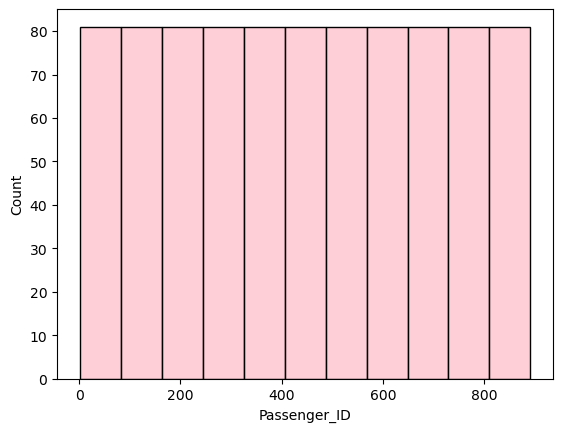

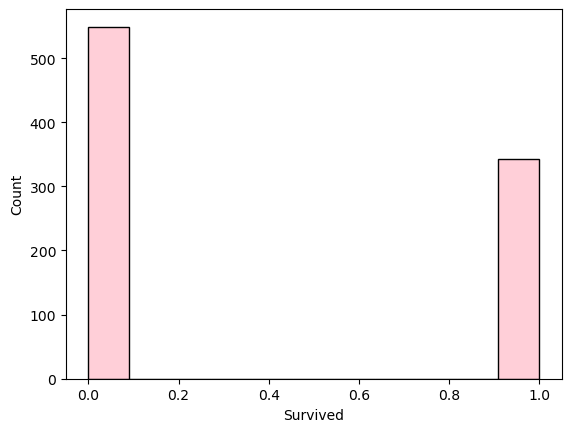

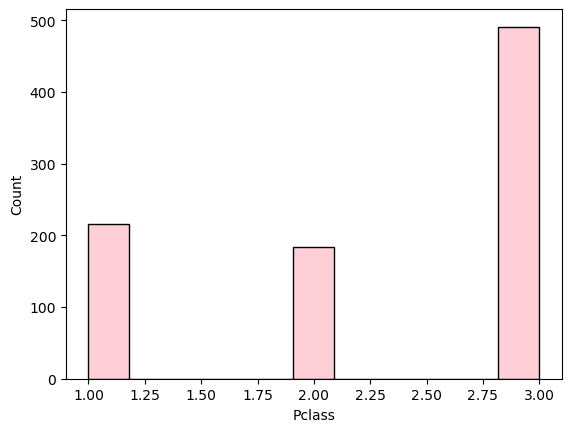

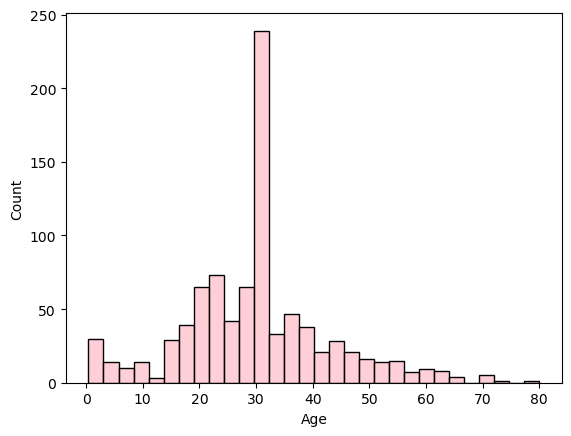

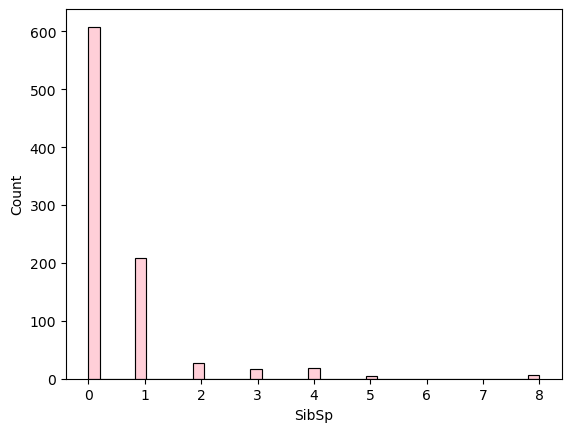

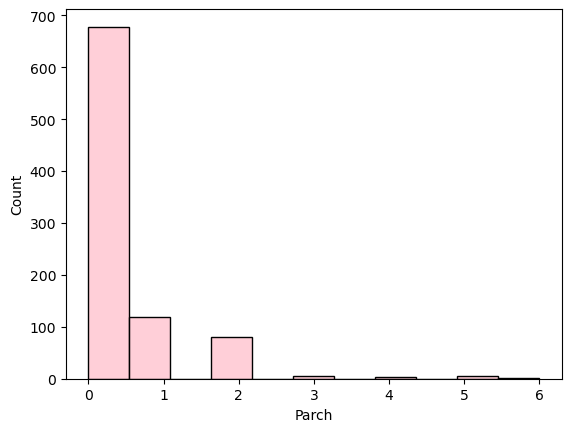

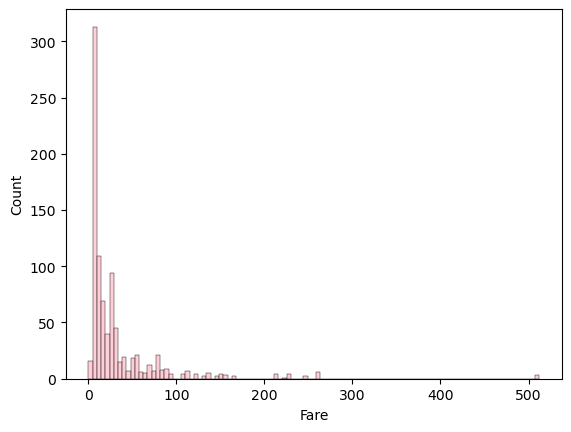

In [67]:
# Histogram to understand the distribution
# drawing histogram for each numerical coloumn
for i in titanic_data.select_dtypes(include = "number").columns:
    sns.histplot(data = titanic_data, x = i, color = "pink")
    plt.show()

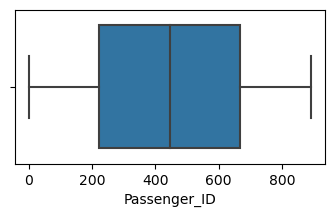

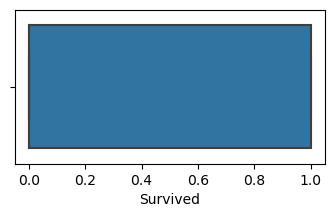

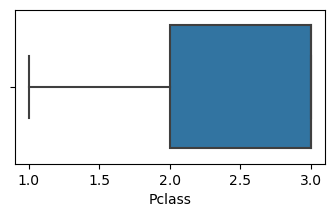

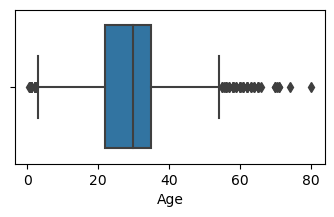

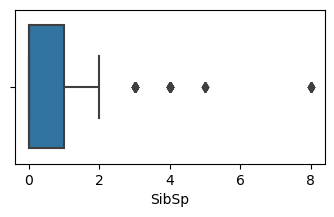

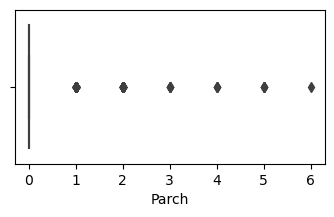

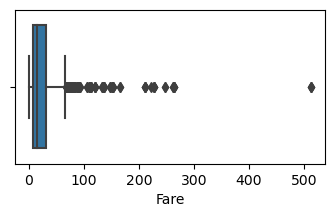

In [69]:
#boxplot - to identify Outliers
for i in titanic_data.select_dtypes(include="number").columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(data = titanic_data, x = i)
    plt.show()

In [70]:
## Correlation with heatmap to interpret the relation and multicolliniarity
s =titanic_data.select_dtypes(include="number").corr()
s

,Passenger_ID,Survived,Pclass,Age,SibSp,Parch,Fare
Passenger_ID,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

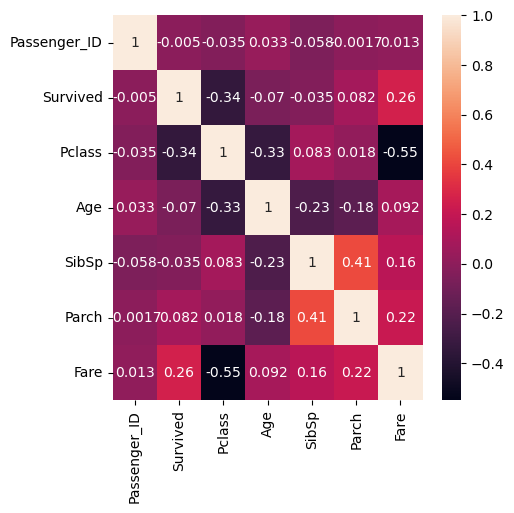

In [71]:
plt.figure(figsize=(5,5))
sns.heatmap(s, annot = True)

### Encoding categorical columns/data

In [74]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [75]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [76]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

<Axes: xlabel='Sex', ylabel='count'>

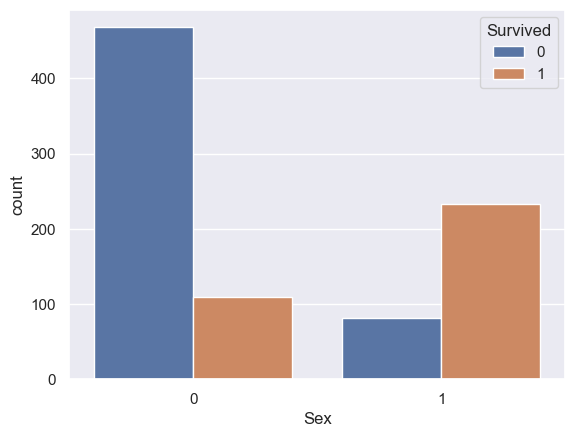

In [78]:
# Analysing Gender wise survivors
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

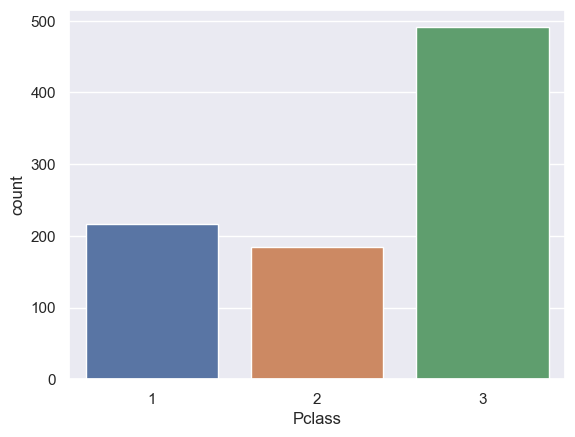

In [79]:
# count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

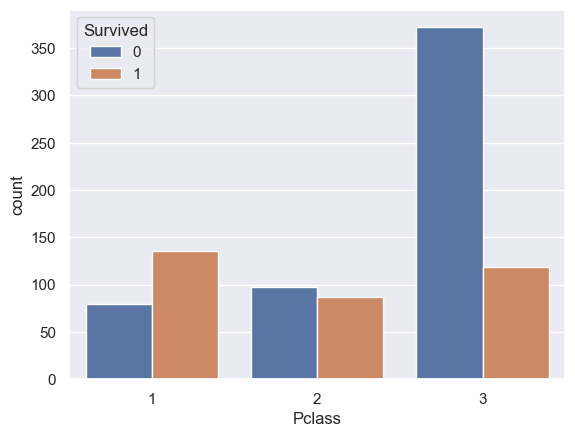

In [80]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

### Splitting Data for Modelling

In [83]:
X = titanic_data.drop(columns = ['Passenger_ID','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [85]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [86]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


### Split the data into test data and train data

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [88]:
print(X.shape, X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


### Logistical regression and model training

In [97]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
X_train_prediction = model.predict(X_train)

In [99]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [100]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [101]:
#Checking the accuracy of test data
X_test_prediction = model.predict(X_test)

In [102]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [104]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7821229050279329


### LR MODEL ENDs

In [105]:
titanic_data.head()

,Passenger_ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [116]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report  # Assuming classification problem
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming analysis_data is your DataFrame containing the relevant columns
x = titanic_data[["Sex", "Pclass", "Age","SibSp", "Fare","Embarked"]]
y = titanic_data["Survived"]

# Convert non-numeric columns to dummy variables (one-hot encoding)
x = pd.get_dummies(x, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=49)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [117]:
# Train the model
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [118]:
# Make predictions on the testing set
y_pred_test2 = model.predict(X_test_scaled)
y_pred_test2

array([0.1       , 0.02      , 0.01      , 0.08      , 0.85      ,
       0.41      , 0.22666667, 0.81      , 0.08      , 0.01      ,
       0.02      , 0.05      , 0.        , 0.19      , 0.24897619,
       0.        , 0.04      , 0.92      , 0.66      , 0.7       ,
       0.11      , 0.        , 0.02      , 0.01      , 0.31      ,
       0.21279365, 0.1       , 0.02      , 0.99      , 0.92      ,
       0.65      , 0.67      , 0.2       , 0.25      , 0.88      ,
       0.3       , 0.        , 0.96      , 0.86      , 0.15      ,
       1.        , 0.61      , 0.53      , 0.14516667, 0.22      ,
       1.        , 0.01      , 0.93      , 0.05      , 0.73483333,
       0.95      , 0.76818182, 0.11      , 0.06166667, 0.        ,
       0.07566667, 0.27      , 0.22      , 0.        , 0.06      ,
       0.01      , 0.        , 0.135     , 0.04833333, 0.        ,
       0.0225    , 0.        , 0.97      , 0.0725    , 1.        ,
       0.        , 0.93      , 0.21      , 0.95      , 0.08666

In [119]:
y_pred_train2 =model.predict(X_train_scaled)
y_pred_train2

array([0.23932501, 0.80417689, 0.06      , 0.        , 0.01      ,
       1.        , 0.04666667, 0.69      , 1.        , 0.08      ,
       1.        , 0.05      , 0.06      , 0.09666667, 0.82      ,
       0.02266667, 0.        , 0.77      , 0.14      , 0.        ,
       1.        , 0.        , 0.15633333, 0.02      , 0.        ,
       0.        , 0.06666667, 0.79      , 1.        , 0.01      ,
       0.97      , 0.23932501, 0.08      , 0.        , 0.12      ,
       0.25      , 0.        , 0.08      , 0.03833333, 0.615     ,
       0.        , 0.48066667, 0.42      , 0.43866667, 0.9380124 ,
       0.07      , 0.        , 0.91      , 0.02      , 0.11666667,
       0.61      , 0.00814103, 1.        , 0.12      , 0.07      ,
       0.05      , 0.01      , 0.13      , 1.        , 0.        ,
       0.04      , 0.94      , 0.96      , 0.03166667, 0.13      ,
       0.        , 0.        , 0.59      , 0.99      , 0.97      ,
       0.99      , 1.        , 0.98      , 0.        , 0.01   

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse = mean_squared_error(y_train, y_pred_train2)
rmse = mean_squared_error(y_train, y_pred_train2, squared=False)
mae = mean_absolute_error(y_train, y_pred_train2)
r2 = r2_score(y_train, y_pred_train2)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.029586903453396634
Root Mean Squared Error (RMSE): 0.17200844006442426
Mean Absolute Error (MAE): 0.10475857327772616
R-squared (R2): 0.8765347472544377


In [121]:
mse_test = mean_squared_error(y_test, y_pred_test2)
rmse_test = mean_squared_error(y_test, y_pred_test2, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test2)
r2_test = r2_score(y_test, y_pred_test2)

print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R2):", r2_test)

Mean Squared Error (MSE): 0.12657321111247094
Root Mean Squared Error (RMSE): 0.35577129045563943
Mean Absolute Error (MAE): 0.2302080033817702
R-squared (R2): 0.4365951293043263


### Thank you!!!!!!